# Macehine Learning Task 4

## 1. Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import NMF
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

## 2. Process the dataset

In [2]:
# 加载数据集
df = pd.read_csv('seeds.csv')

# 提取谷物种类和特征数据
grain_variety = df['grain_variety']
feature_data = df.drop(columns=['grain_variety'])

# 将特征数据转换为numpy数组
feature_data_np = feature_data.values

## 3. Run the non-negative matrix decomposition and calculate the Silhouette coefficients

In [3]:
# 定义NMF参数
rank = 3
repeat_times = 20
max_iter = 1000

# 用于存储轮廓系数的占位符
silhouette_scores = []
clustering_results = []

# 多次运行NMF并计算轮廓系数
for i in range(repeat_times):
    model = NMF(n_components=rank, init='random', max_iter = max_iter, random_state=None)
    W = model.fit_transform(feature_data_np)
    H = model.components_

    # 根据最高成分权重分配聚类
    clusters = np.argmax(W, axis=1)
    clustering_results.append(clusters)
    
    # 检查聚类结果的唯一标签数
    if len(np.unique(clusters)) > 1:
        # 计算轮廓系数
        score = silhouette_score(feature_data_np, clusters)
        silhouette_scores.append(score)
    else:
        # 如果只有一个簇，分数为负无穷
        silhouette_scores.append(-np.inf)

## 4. Plot a line graph

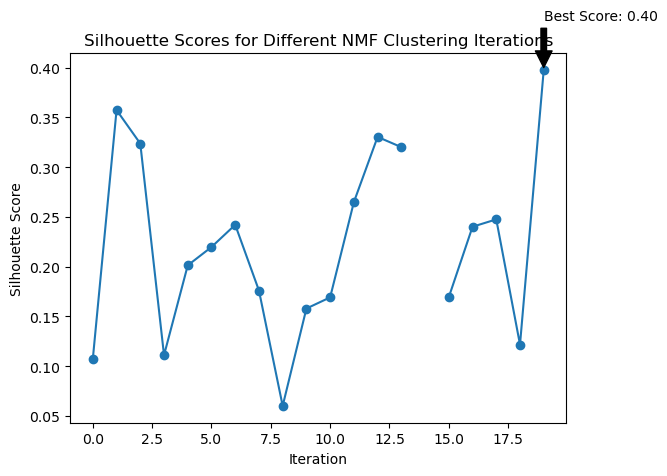

In [4]:
# 绘制轮廓系数
plt.plot(silhouette_scores, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different NMF Clustering Iterations')
plt.annotate(f'Best Score: {max(silhouette_scores):.2f}', xy=(np.argmax(silhouette_scores), max(silhouette_scores)), 
             xytext=(np.argmax(silhouette_scores), max(silhouette_scores)+0.05),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

## 5. make a crosstab of the varieties

In [5]:
# 确定最佳聚类结果
best_index = np.argmax(silhouette_scores)
best_clusters = clustering_results[best_index]

# 将最佳聚类结果转换为DataFrame
best_clusters_df = pd.DataFrame(best_clusters, columns=['Cluster'])

# 创建品种和最佳聚类结果的交叉表
crosstab = pd.crosstab(grain_variety, best_clusters_df['Cluster'])
print(crosstab)

Cluster          0   1  2
grain_variety            
Canadian wheat   0  68  2
Kama wheat      33  37  0
Rosa wheat      70   0  0
